In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_m11_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          8.0585 ( 7.5860,  8.3226) ( 7.6662,  8.3344)  0.6682 (Jnode 106)\n',
 't_n56          7.9219 ( 7.4659,  8.2616) ( 7.5265,  8.2937)  0.7672 (Jnode 105)\n',
 't_n57          7.5287 ( 7.1268,  7.8619) ( 7.1677,  7.8919)  0.7243 (Jnode 104)\n',
 't_n58          6.5570 ( 6.2927,  6.8817) ( 6.2749,  6.8606)  0.5857 (Jnode 103)\n',
 't_n59          6.3646 ( 6.1125,  6.6870) ( 6.0998,  6.6664)  0.5666 (Jnode 102)\n',
 't_n60          6.0911 ( 5.8424,  6.4161) ( 5.8178,  6.3833)  0.5655 (Jnode 101)\n',
 't_n61          5.6679 ( 5.4004,  6.0080) ( 5.3734,  5.9751)  0.6017 (Jnode 100)\n',
 't_n62          2.4544 ( 1.6086,  3.3089) ( 1.6185,  3.3164)  1.6979 (Jnode 99)\n',
 't_n63          3.8635 ( 3.2005,  4.4435) ( 3.2305,  4.4670)  1.2365 (Jnode 98)\n',
 't_n64          2.7100 ( 2.1061,  3.3018) ( 2.1038,  3.2985)  1.1947 (Jnode 97)\n',
 't_n65          2.3764 ( 1.8192,  2.9383) ( 1.8159,  2.9300)  1.1141 (Jnode 96)\n',
 't_n66          1.8261 ( 1.3636,  2.3256) ( 1.3527,  2.31

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[8.0585,
 7.9219,
 7.5287,
 6.557,
 6.3646,
 6.0911,
 5.6679,
 2.4544,
 3.8635,
 2.71,
 2.3764,
 1.8261,
 1.2234,
 0.8108,
 0.3474,
 2.8447,
 6.2222,
 6.0441,
 5.6572,
 3.9622,
 3.5456,
 3.0541,
 6.0509,
 5.7851,
 5.6049,
 5.2468,
 4.8026,
 4.6674,
 4.0315,
 3.6598,
 3.3447,
 2.4733,
 2.2808,
 4.0648,
 3.2603,
 5.9451,
 1.2107,
 5.8207,
 5.4663,
 4.8609,
 4.5139,
 3.2842,
 3.7799,
 4.669,
 4.5032,
 4.1999,
 3.0078,
 4.0575,
 6.8753,
 5.2047,
 3.1892,
 2.3313,
 5.611]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_m11_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[8.24,
 8.1787,
 7.5737,
 6.7517,
 6.4609,
 6.0824,
 5.5068,
 2.7028,
 3.9213,
 2.7636,
 2.3211,
 1.7348,
 1.1441,
 0.7541,
 0.3236,
 2.8975,
 6.146,
 5.162,
 5.522,
 3.9832,
 3.3867,
 3.2628,
 6.2157,
 5.8234,
 5.534,
 5.1497,
 4.65,
 4.3905,
 3.7061,
 3.258,
 2.8507,
 2.1116,
 1.7895,
 3.87,
 3.0078,
 6.0284,
 1.6416,
 5.819,
 5.3909,
 4.6892,
 4.1973,
 3.0227,
 3.2612,
 4.5388,
 4.1425,
 3.5101,
 3.0206,
 3.9533,
 6.8897,
 5.391,
 3.3789,
 2.9296,
 6.1536]

In [12]:
posterior_mean_iqtree

[8.0585,
 7.9219,
 7.5287,
 6.557,
 6.3646,
 6.0911,
 5.6679,
 2.4544,
 3.8635,
 2.71,
 2.3764,
 1.8261,
 1.2234,
 0.8108,
 0.3474,
 2.8447,
 6.2222,
 6.0441,
 5.6572,
 3.9622,
 3.5456,
 3.0541,
 6.0509,
 5.7851,
 5.6049,
 5.2468,
 4.8026,
 4.6674,
 4.0315,
 3.6598,
 3.3447,
 2.4733,
 2.2808,
 4.0648,
 3.2603,
 5.9451,
 1.2107,
 5.8207,
 5.4663,
 4.8609,
 4.5139,
 3.2842,
 3.7799,
 4.669,
 4.5032,
 4.1999,
 3.0078,
 4.0575,
 6.8753,
 5.2047,
 3.1892,
 2.3313,
 5.611]

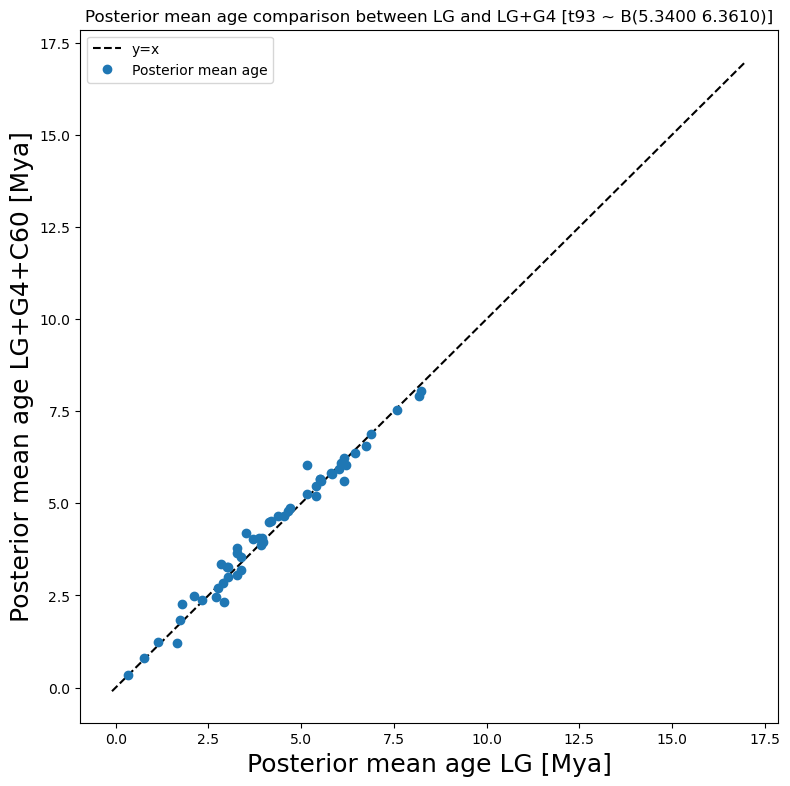

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t93 ~ B(5.3400 6.3610)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_m11_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')